In [2]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors

In [6]:
%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__


'0.16.0'

Davis, CA

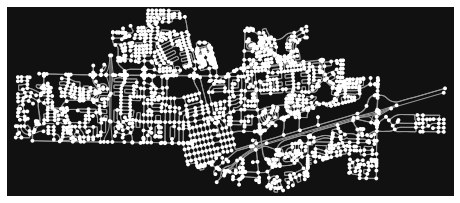

In [9]:
G = ox.graph_from_place('Davis, CA USA', network_type='drive')
fig, ax = ox.plot_graph(G)

UC Davis

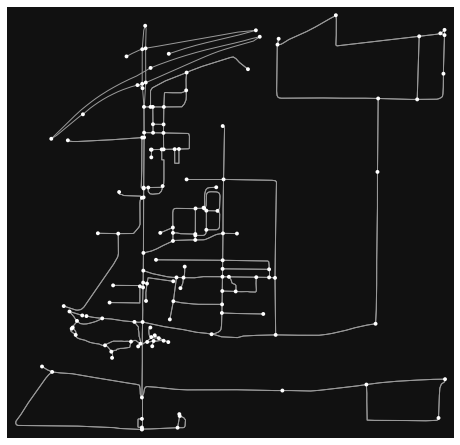

(38.52247515, -121.75139267491295)

In [27]:
G, coord = ox.graph_from_address('UC Davis, CA USA', network_type='all_private', return_coords=True)
fig, ax = ox.plot_graph(G)
coord

South Horizons, HK

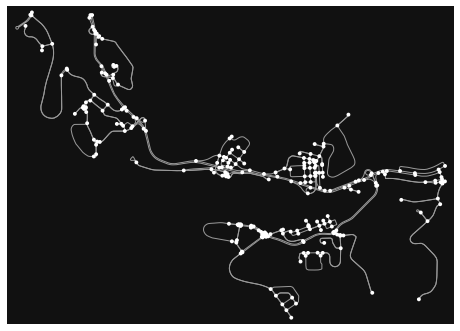

In [26]:
G = ox.graph_from_point((22.2434,114.1476), dist=2000,network_type='drive')
fig, ax = ox.plot_graph(G)

In [19]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

3258907.685592851

In [28]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

{'n': 148,
 'm': 353,
 'k_avg': 4.77027027027027,
 'intersection_count': 117,
 'streets_per_node_avg': 2.689189189189189,
 'streets_per_node_counts': {0: 0, 1: 31, 2: 0, 3: 101, 4: 16},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.20945945945945946,
  2: 0.0,
  3: 0.6824324324324325,
  4: 0.10810810810810811},
 'edge_length_total': 49614.897999999965,
 'edge_length_avg': 140.55211898016987,
 'street_length_total': 26807.92000000001,
 'street_length_avg': 144.1286021505377,
 'street_segments_count': 186,
 'node_density_km': 45.4139896795132,
 'intersection_density_km': 35.9015999493449,
 'edge_density_km': 15224.39503866283,
 'street_density_km': 8226.04460952173,
 'circuity_avg': 1.1134401885047158,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 86,
 'clean_intersection_density_km': 26.38921021917659}

### Visualize street centrality: indicates how close a node is to all other nodes in the network

In [29]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, 'edge_centrality')

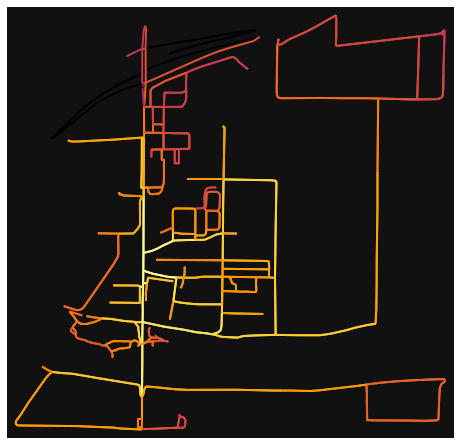

In [33]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, 'edge_centrality', cmap='inferno')
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

### Routing

In [34]:
# impute missing edge speeds then calculate edge travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [42]:
# get the nearest network nodes to two lat/lng points
orig = ox.get_nearest_node(G, (38.52247515, -121.73139267491295))
dest = ox.get_nearest_node(G, (38.51247515, -121.74139267491295))

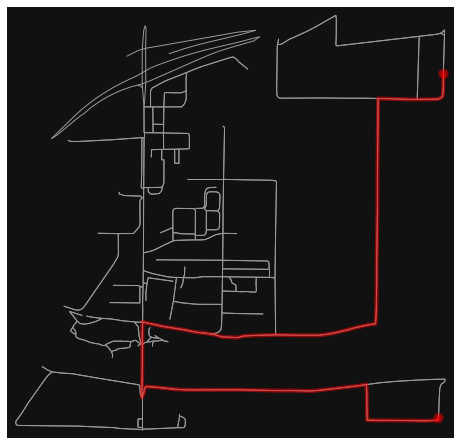

In [43]:
# find the shortest path between these nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight='travel_time')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [44]:
# how long is our route in meters?
edge_lengths = ox.utils_graph.get_route_edge_attributes(G, route, 'length')
sum(edge_lengths)

4477.9039999999995

In [45]:
# how far is it between these two nodes as the crow flies (haversine)?
ox.distance.great_circle_vec(G.nodes[orig]['y'], G.nodes[orig]['x'],
                             G.nodes[dest]['y'], G.nodes[dest]['x'])

1596.5917673014017

In [46]:
# add elevation to nodes automatically, calculate edge grades, plot network
# you need a google elevation api key to run this cell!
from keys import google_elevation_api_key
G = ox.add_node_elevations(G, api_key=google_elevation_api_key)
G = ox.add_edge_grades(G)
nc = ox.plot.get_node_colors_by_attr(G, 'elevation', cmap='plasma')
fig, ax = ox.plot_graph(G, node_color=nc, node_size=20, edge_linewidth=2, edge_color='#333')

ModuleNotFoundError: No module named 'keys'

Get networks in other way

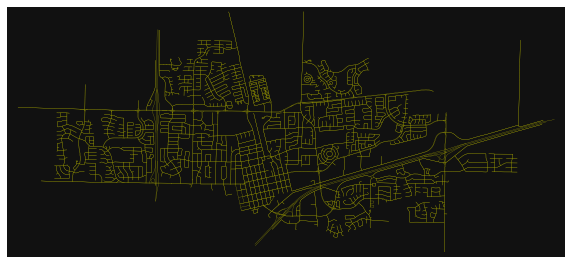

In [50]:
# you can make query an unambiguous dict to help the geocoder find it
place = {'city'   : 'Davis',
         'state'  : 'California',
         'country': 'USA'}
G = ox.graph_from_place(place, network_type='drive', truncate_by_edge=True)
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color='y', edge_linewidth=0.2)

Get other network types

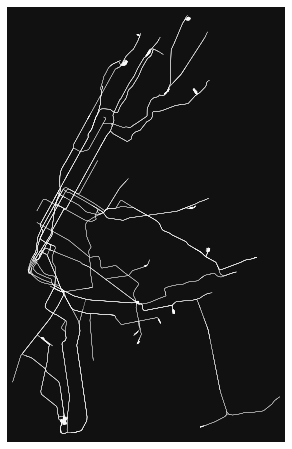

In [61]:
# get NY subway rail network
G = ox.graph_from_place('New York City',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        custom_filter='["railway"~"subway"]')

fig, ax = ox.plot_graph(G, node_size=0, edge_color='w', edge_linewidth=0.2)